In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

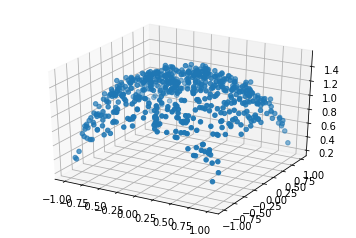

In [41]:
X_train = np.random.uniform(-1, 1, size=[600, 2])
Y_train = np.sqrt(2-X_train[:,0]**2 - X_train[:,1]**2) + np.random.normal(size = len(X_train), scale=0.05)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], Y_train)

In [42]:
class autoencoder(nn.Module):
    
    def __init__(self, input_size, hidden_size_1, encoded_size, hidden_size_2):
        super(autoencoder, self).__init__()
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.encoded_size = encoded_size
        self.hidden_size_2 = hidden_size_2
        
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size_1)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size_1, self.encoded_size)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(self.encoded_size, self.hidden_size_2)
        self.relu3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(self.hidden_size_2, self.input_size)
        
    def forward(self, x):
        h1 = self.fc1(x)
        r1 = self.relu1(h1)
        h2 = self.fc2(r1)
        r2 = self.relu2(h2)
        h3 = self.fc3(r2)
        r3 = self.relu3(h3)
        output = self.fc4(r3)
        return output

In [49]:
network = autoencoder(3, 10, 2, 10)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.1)
print(network)

autoencoder(
  (fc1): Linear(in_features=3, out_features=10, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=2, out_features=10, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=10, out_features=3, bias=True)
)


In [50]:
Z = []
for i in range(len(X_train)):
    Z.append(np.append(X_train[i], Y_train[i]))
Z = np.array(Z)

Z_train = Z[0:500]
Z_test = Z[500:600]

In [55]:
network.train()
epoch = 10
for epoch in range(epoch):
    for i in range(len(Z_train)):
        z = Z_train[i]
        z = Variable(torch.FloatTensor(z).float(), requires_grad=True)
        optimizer.zero_grad()
        outputs = network(z)
        loss = criterion(outputs, z)
        loss.backward()
        optimizer.step()
        if i % 300 == 0:
            print("Epoch {} - loss: {}".format(epoch, loss.data))

Epoch 0 - loss: 0.003484382526949048
Epoch 0 - loss: 0.0014851102605462074
Epoch 1 - loss: 0.0007998337969183922
Epoch 1 - loss: 0.0006736837676726282
Epoch 2 - loss: 0.00038188439793884754
Epoch 2 - loss: 0.0006128388922661543
Epoch 3 - loss: 0.00040930070099420846
Epoch 3 - loss: 0.0006156844319775701
Epoch 4 - loss: 0.000286443333607167
Epoch 4 - loss: 0.00039431601180695
Epoch 5 - loss: 0.0002806696284096688
Epoch 5 - loss: 0.0006350483163259923
Epoch 6 - loss: 0.0003867213090416044
Epoch 6 - loss: 0.0006286161369644105
Epoch 7 - loss: 0.00035207587643526495
Epoch 7 - loss: 0.0004518482310231775
Epoch 8 - loss: 0.0003702991234604269
Epoch 8 - loss: 0.0008398909121751785
Epoch 9 - loss: 0.00039892146014608443
Epoch 9 - loss: 0.0008198489085771143


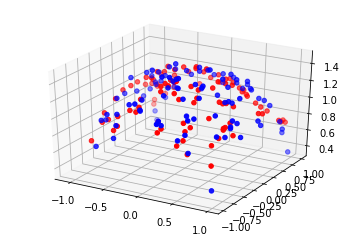

In [63]:
network.eval()
Z_pred = network(torch.from_numpy(Z_test).float()).detach().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z_pred[:,0], Z_pred[:,1], Z_pred[:,2], c = 'r')
ax.scatter(Z_test[:,0], Z_test[:,1], Z_test[:,2], c = 'b')